In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import re
import joblib
import string

In [2]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
fake=pd.read_csv("Fake.csv")
true=pd.read_csv("True.csv")


In [4]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
true.head()


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
fake['class']=0
true['class']=1

In [7]:
data=pd.concat([fake,true],axis=0)

In [8]:
data.sample(10)

,title,text,subject,date,class
11702,Hillary Supporter MARK CUBAN Makes Most Ignora...,TMZ caught up with Mavericks owner and Hillary...,politics,"Feb 9, 2017",0
4728,Trump expected to nominate attorney Sullivan a...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"March 24, 2017",1
20441,"Hyundai Motor, Kia to temporarily shut down U....",SEOUL (Reuters) - South Korea s Hyundai Motor ...,worldnews,"September 11, 2017",1
2039,White House to send memo to Pentagon soon on t...,WASHINGTON (Reuters) - The White House is expe...,politicsNews,"August 24, 2017",1
15219,(VIDEO) BALTIMORE MAYOR GIVES TOTALLY INSANE R...,The reason the Baltimore Mayor gives for the h...,politics,"Sep 9, 2015",0
17148,"Saudi airplane arrives in Baghdad, first time ...",BAGHDAD (Reuters) - A Saudi Arabian commercial...,worldnews,"October 18, 2017",1
20471,BORDER PATROL AGENTS RAT OUT DHS: Government S...,It s really a pretty simple scheme. Obama is p...,left-news,"Jun 5, 2016",0
1834,What Republicans Are Doing To Stop People Fro...,"Let s face it, if it weren t for gerrymanderin...",News,"April 10, 2017",0
20348,Gwenyth Paltrow Can’t Understand Why She Was N...,Obama drone Gwyneth Paltrow can t understand w...,left-news,"Jun 30, 2016",0
21125,MIGRANTS BRUTALLY GANG RAPE 3 YR OLD BOY At As...,The world is stunned by the number of women an...,left-news,"Jan 13, 2016",0


In [9]:
data = data.drop(["title", "subject","date"], axis = 1)

In [10]:
data.reset_index(inplace=True)

In [11]:
data.drop(['index'],axis=1,inplace=True)

In [12]:
data.sample(5)

,text,class
1126,The Trump White House is now officially in ful...,0
259,Remember when half of America had their credit...,0
11570,https://www.youtube.com/watch?v=J4LjxrOfEF8,0
4399,You can t say that both parties are the same w...,0
16957,President Obama on ISIS: They re a bunch of k...,0


In [13]:
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]',"", text)
    text = re.sub("\\W"," " ,text)
    text = re.sub("https?:://\s+\www\.\S+", "", text)
    text = re.sub("<.*?>+","",text)
    text = re.sub("[%s]" % re.escape (string.punctuation), "", text)
    text = re.sub("\n","",text)
    text = re.sub("\w*\d\w*", "", text)
    return text


In [14]:
data["text"] = data["text"].apply(clean_text)

In [15]:
x=data["text"]
y=data["class"]
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.25, random_state=42)

In [16]:
vectorizer = TfidfVectorizer()
xv_train = vectorizer.fit_transform(xtrain)
xv_test = vectorizer.transform(xtest)

In [17]:
lr = LogisticRegression()
lr.fit(xv_train, ytrain)

LogisticRegression()

In [18]:
prediction = lr.predict(xv_test)
lr.score(xv_test,ytest)

0.9858351893095768

In [19]:
print(classification_report(ytest, prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5895
           1       0.98      0.99      0.99      5330

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [20]:
joblib.dump(vectorizer, "vectorizer.jb")
joblib.dump(lr, "lr_model.jb")

['lr_model.jb']

Accuracy: 0.90


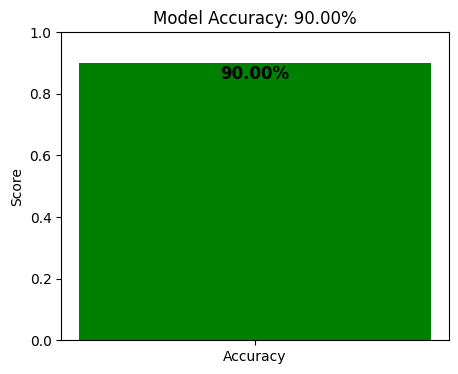

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 1]
y_pred = [1, 0, 1, 1, 0, 1, 0, 1, 1, 1]  


accuracy = accuracy_score(y_true, y_pred)

print(f'Accuracy: {accuracy:.2f}')

# Plot the accuracy
plt.figure(figsize=(5, 4))
plt.bar(["Accuracy"], [accuracy], color="green")
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.ylabel("Score")
plt.title(f"Model Accuracy: {accuracy:.2%}")
plt.text(0, accuracy - 0.05, f"{accuracy:.2%}", ha="center", fontsize=12, fontweight="bold")

# Show the plot
plt.show()
